In [1]:
#libriaries
import datetime
from datetime import datetime
import numpy                      as np
import pandas                     as pd
import matplotlib.pyplot          as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from statsmodels.tsa.seasonal     import seasonal_decompose, STL

In [2]:
a=pd.read_excel('Internship_data.xlsx',engine='openpyxl')
a.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [3]:
len(a)

377719

In [4]:
b=a.copy()
b.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.9
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.1,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [5]:
b.dtypes

time                        datetime64[ns]
Cyclone_Inlet_Gas_Temp              object
Cyclone_Material_Temp               object
Cyclone_Outlet_Gas_draft            object
Cyclone_cone_draft                  object
Cyclone_Gas_Outlet_Temp             object
Cyclone_Inlet_Draft                 object
dtype: object

In [6]:
b['Cyclone_Inlet_Gas_Temp'].replace({'I/O Timeout':np.NaN,'Not Connect':np.NaN,'Scan Timeout':np.NaN,'Configure':np.NaN,'Comm Fail':np.NaN},inplace=True)

In [7]:
b['Cyclone_Inlet_Gas_Temp']=b['Cyclone_Inlet_Gas_Temp'].astype('float')
b.dtypes

time                        datetime64[ns]
Cyclone_Inlet_Gas_Temp             float64
Cyclone_Material_Temp               object
Cyclone_Outlet_Gas_draft            object
Cyclone_cone_draft                  object
Cyclone_Gas_Outlet_Temp             object
Cyclone_Inlet_Draft                 object
dtype: object

In [8]:
b['Cyclone_Material_Temp'].replace({'I/O Timeout':np.NaN,'Not Connect':np.NaN,'Scan Timeout':np.NaN,'Configure':np.NaN,'Comm Fail':np.NaN,'Unit Down':np.NaN},inplace=True)

In [9]:
b['Cyclone_Material_Temp']=b['Cyclone_Material_Temp'].astype('float')
b.dtypes

time                        datetime64[ns]
Cyclone_Inlet_Gas_Temp             float64
Cyclone_Material_Temp              float64
Cyclone_Outlet_Gas_draft            object
Cyclone_cone_draft                  object
Cyclone_Gas_Outlet_Temp             object
Cyclone_Inlet_Draft                 object
dtype: object

In [10]:
b['Cyclone_Outlet_Gas_draft'].replace({'I/O Timeout':np.NaN,'Not Connect':np.NaN,'Scan Timeout':np.NaN,'Configure':np.NaN,'Comm Fail':np.NaN,'Unit Down':np.NaN},inplace=True)

In [11]:
b['Cyclone_Outlet_Gas_draft']=b['Cyclone_Outlet_Gas_draft'].astype('float')
b.dtypes

time                        datetime64[ns]
Cyclone_Inlet_Gas_Temp             float64
Cyclone_Material_Temp              float64
Cyclone_Outlet_Gas_draft           float64
Cyclone_cone_draft                  object
Cyclone_Gas_Outlet_Temp             object
Cyclone_Inlet_Draft                 object
dtype: object

In [12]:
b['Cyclone_cone_draft'].replace({'I/O Timeout':np.NaN,'Not Connect':np.NaN,'Scan Timeout':np.NaN,'Configure':np.NaN,'Comm Fail':np.NaN,'Unit Down':np.NaN},inplace=True)

In [13]:
b['Cyclone_cone_draft']=b['Cyclone_cone_draft'].astype('float')
b.dtypes

time                        datetime64[ns]
Cyclone_Inlet_Gas_Temp             float64
Cyclone_Material_Temp              float64
Cyclone_Outlet_Gas_draft           float64
Cyclone_cone_draft                 float64
Cyclone_Gas_Outlet_Temp             object
Cyclone_Inlet_Draft                 object
dtype: object

In [14]:
b['Cyclone_Gas_Outlet_Temp'].replace({'I/O Timeout':np.NaN,'Not Connect':np.NaN,'Scan Timeout':np.NaN,'Configure':np.NaN,'Comm Fail':np.NaN,'Unit Down':np.NaN},inplace=True)

In [15]:
b['Cyclone_Gas_Outlet_Temp']=b['Cyclone_Gas_Outlet_Temp'].astype('float')
b.dtypes

time                        datetime64[ns]
Cyclone_Inlet_Gas_Temp             float64
Cyclone_Material_Temp              float64
Cyclone_Outlet_Gas_draft           float64
Cyclone_cone_draft                 float64
Cyclone_Gas_Outlet_Temp            float64
Cyclone_Inlet_Draft                 object
dtype: object

In [16]:
b['Cyclone_Inlet_Draft'].replace({'I/O Timeout':np.NaN,'Not Connect':np.NaN,'Scan Timeout':np.NaN,'Configure':np.NaN,'Comm Fail':np.NaN,'Unit Down':np.NaN},inplace=True)

In [17]:
b['Cyclone_Gas_Outlet_Temp']=b['Cyclone_Gas_Outlet_Temp'].astype('float')
b.dtypes

time                        datetime64[ns]
Cyclone_Inlet_Gas_Temp             float64
Cyclone_Material_Temp              float64
Cyclone_Outlet_Gas_draft           float64
Cyclone_cone_draft                 float64
Cyclone_Gas_Outlet_Temp            float64
Cyclone_Inlet_Draft                float64
dtype: object

In [18]:
b.isnull().sum()

time                           0
Cyclone_Inlet_Gas_Temp      1320
Cyclone_Material_Temp       1591
Cyclone_Outlet_Gas_draft    1321
Cyclone_cone_draft          1320
Cyclone_Gas_Outlet_Temp     1321
Cyclone_Inlet_Draft         1322
dtype: int64

In [19]:
b['Date'] = pd.to_datetime(b['time']).dt.date
b.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,Date
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90,2017-01-01
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76,2017-01-01
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01,2017-01-01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82,2017-01-01
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39,2017-01-01


In [20]:
c=b.drop('time',axis=1)
c.head()

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,Date
0,867.63,910.42,-189.54,-186.04,852.13,-145.90,2017-01-01
1,879.23,918.14,-184.33,-182.10,862.53,-149.76,2017-01-01
2,875.67,924.18,-181.26,-166.47,866.06,-145.01,2017-01-01
3,875.28,923.15,-179.15,-174.83,865.85,-142.82,2017-01-01
4,891.66,934.26,-178.32,-173.72,876.06,-143.39,2017-01-01


In [21]:
c.columns

Index(['Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
       'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft', 'Date'],
      dtype='object')

In [22]:
c=c[['Date','Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
       'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft']]
c.head()

,Date,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01,867.63,910.42,-189.54,-186.04,852.13,-145.90
1,2017-01-01,879.23,918.14,-184.33,-182.10,862.53,-149.76
2,2017-01-01,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [23]:
c['Date']=pd.to_datetime(c['Date'])
c.dtypes

Date                        datetime64[ns]
Cyclone_Inlet_Gas_Temp             float64
Cyclone_Material_Temp              float64
Cyclone_Outlet_Gas_draft           float64
Cyclone_cone_draft                 float64
Cyclone_Gas_Outlet_Temp            float64
Cyclone_Inlet_Draft                float64
dtype: object

In [24]:
c.head()

,Date,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01,867.63,910.42,-189.54,-186.04,852.13,-145.90
1,2017-01-01,879.23,918.14,-184.33,-182.10,862.53,-149.76
2,2017-01-01,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [25]:
c.groupby(by='Date').mean()

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
Date,,,,,,
2017-01-01,881.853993,934.871319,-180.013854,-163.714826,870.444618,-144.056111
2017-01-02,898.279271,942.945556,-186.367153,-180.363090,875.003576,-149.720729
2017-01-03,893.345972,927.172153,-185.154479,-163.163854,855.356181,-148.895729
2017-01-04,893.935174,927.265694,-187.595347,-161.060312,857.989896,-152.994132
2017-01-05,888.763750,926.464479,-188.448507,-161.894722,858.314201,-155.905556
...,...,...,...,...,...,...
2020-08-03,883.574410,893.076458,-241.310486,-212.520590,881.129722,-189.252813
2020-08-04,888.390937,906.568042,-233.734618,-211.970799,885.054444,-182.459618
2020-08-05,892.585972,910.440451,-231.381250,-203.936875,891.515278,-181.235868


In [26]:
date=pd.date_range(start='01/01/2017',end='08/07/2020',freq='D')
date

DatetimeIndex(['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04',
               '2017-01-05', '2017-01-06', '2017-01-07', '2017-01-08',
               '2017-01-09', '2017-01-10',
               ...
               '2020-07-29', '2020-07-30', '2020-07-31', '2020-08-01',
               '2020-08-02', '2020-08-03', '2020-08-04', '2020-08-05',
               '2020-08-06', '2020-08-07'],
              dtype='datetime64[ns]', length=1315, freq='D')

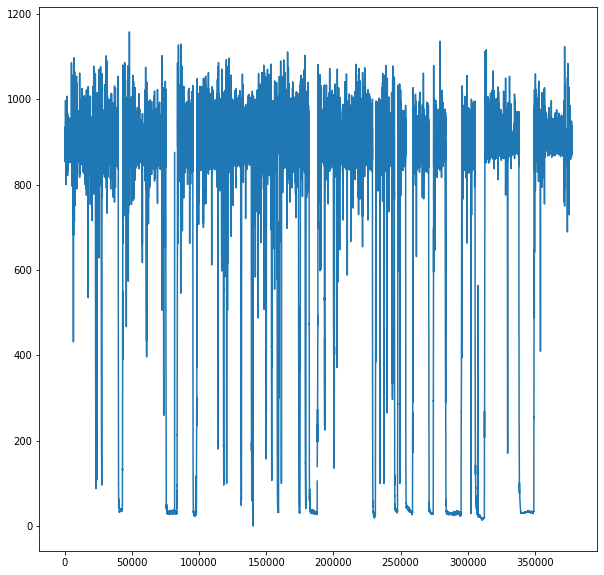

In [27]:
plt.rcParams['figure.figsize']=(10,10)
c['Cyclone_Inlet_Gas_Temp'].plot()
plt.show()

In [28]:
c.isnull().sum()

Date                           0
Cyclone_Inlet_Gas_Temp      1320
Cyclone_Material_Temp       1591
Cyclone_Outlet_Gas_draft    1321
Cyclone_cone_draft          1320
Cyclone_Gas_Outlet_Temp     1321
Cyclone_Inlet_Draft         1322
dtype: int64

In [29]:
d=c.fillna(c.rolling(1000,min_periods=1).mean())
d.isnull().sum()

Date                        0
Cyclone_Inlet_Gas_Temp      0
Cyclone_Material_Temp       0
Cyclone_Outlet_Gas_draft    0
Cyclone_cone_draft          0
Cyclone_Gas_Outlet_Temp     0
Cyclone_Inlet_Draft         0
dtype: int64

In [30]:
dt=d.groupby(by='Date').mean()
dt.head()

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
Date,,,,,,
2017-01-01,881.853993,934.871319,-180.013854,-163.714826,870.444618,-144.056111
2017-01-02,898.279271,942.945556,-186.367153,-180.363090,875.003576,-149.720729
2017-01-03,893.345972,927.172153,-185.154479,-163.163854,855.356181,-148.895729
2017-01-04,893.935174,927.265694,-187.595347,-161.060312,857.989896,-152.994132
2017-01-05,888.763750,926.464479,-188.448507,-161.894722,858.314201,-155.905556


In [31]:
dt.tail()

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
Date,,,,,,
2020-08-03,883.574410,893.076458,-241.310486,-212.520590,881.129722,-189.252813
2020-08-04,888.390937,906.539355,-233.734618,-211.970799,885.054444,-182.459618
2020-08-05,892.585972,910.440451,-231.381250,-203.936875,891.515278,-181.235868
2020-08-06,894.407535,910.064375,-230.577292,-204.826458,896.808993,-180.600868
2020-08-07,890.555743,905.269527,-225.720270,-199.388041,890.748649,-175.968243


In [32]:
dt1=pd.DataFrame(dt['Cyclone_Inlet_Gas_Temp'])
dt1.head()

,Cyclone_Inlet_Gas_Temp
Date,
2017-01-01,881.853993
2017-01-02,898.279271
2017-01-03,893.345972
2017-01-04,893.935174
2017-01-05,888.763750


In [33]:
dt2=pd.DataFrame(dt['Cyclone_Material_Temp'])
dt2.head()

,Cyclone_Material_Temp
Date,
2017-01-01,934.871319
2017-01-02,942.945556
2017-01-03,927.172153
2017-01-04,927.265694
2017-01-05,926.464479


In [34]:
dt3=pd.DataFrame(dt['Cyclone_Outlet_Gas_draft'])
dt3.head()

,Cyclone_Outlet_Gas_draft
Date,
2017-01-01,-180.013854
2017-01-02,-186.367153
2017-01-03,-185.154479
2017-01-04,-187.595347
2017-01-05,-188.448507


In [35]:
dt4=pd.DataFrame(dt['Cyclone_cone_draft'])
dt4.head()

,Cyclone_cone_draft
Date,
2017-01-01,-163.714826
2017-01-02,-180.363090
2017-01-03,-163.163854
2017-01-04,-161.060312
2017-01-05,-161.894722


In [36]:
dt5=pd.DataFrame(dt['Cyclone_Gas_Outlet_Temp'])
dt5.head()

,Cyclone_Gas_Outlet_Temp
Date,
2017-01-01,870.444618
2017-01-02,875.003576
2017-01-03,855.356181
2017-01-04,857.989896
2017-01-05,858.314201


In [37]:
dt6=pd.DataFrame(dt['Cyclone_Inlet_Draft'])
dt6.head()

,Cyclone_Inlet_Draft
Date,
2017-01-01,-144.056111
2017-01-02,-149.720729
2017-01-03,-148.895729
2017-01-04,-152.994132
2017-01-05,-155.905556


# Cyclone Inlet Gas Temperature

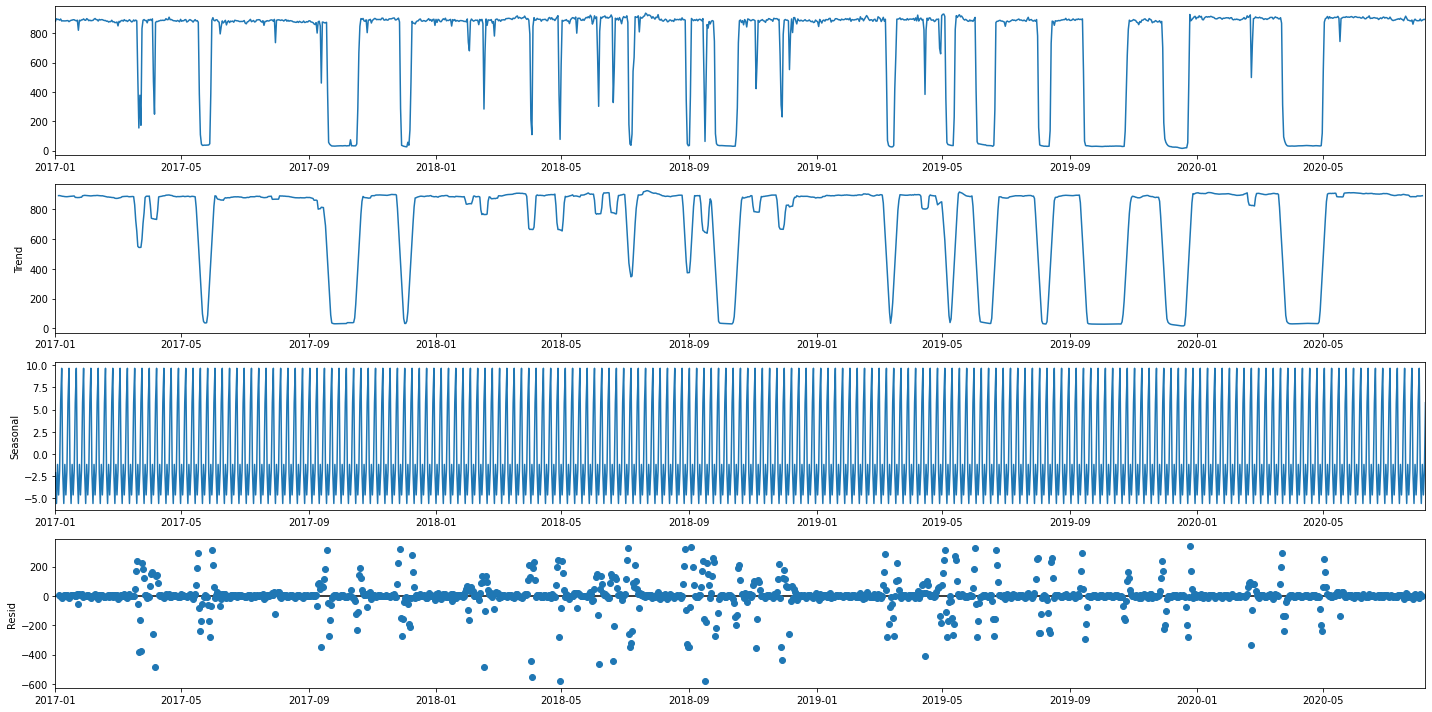

In [38]:
plt.rcParams['figure.figsize']=(20,10)
decomposition = seasonal_decompose(dt1,model='additive')
decomposition.plot();

The anomalies can be identified as the events away from the normal i.e is 0 so the anomalies detected are at 2017-4, 2017-6, 2017-10, 2017-11, 2017-12,2018-3,lot of anomalies between 2018-4 to 2018-12, 2019-4, 2019-6, 2019-7, 2019-10, 2019-11, 2019-12 ,2020-05

# Cyclone Material Temp

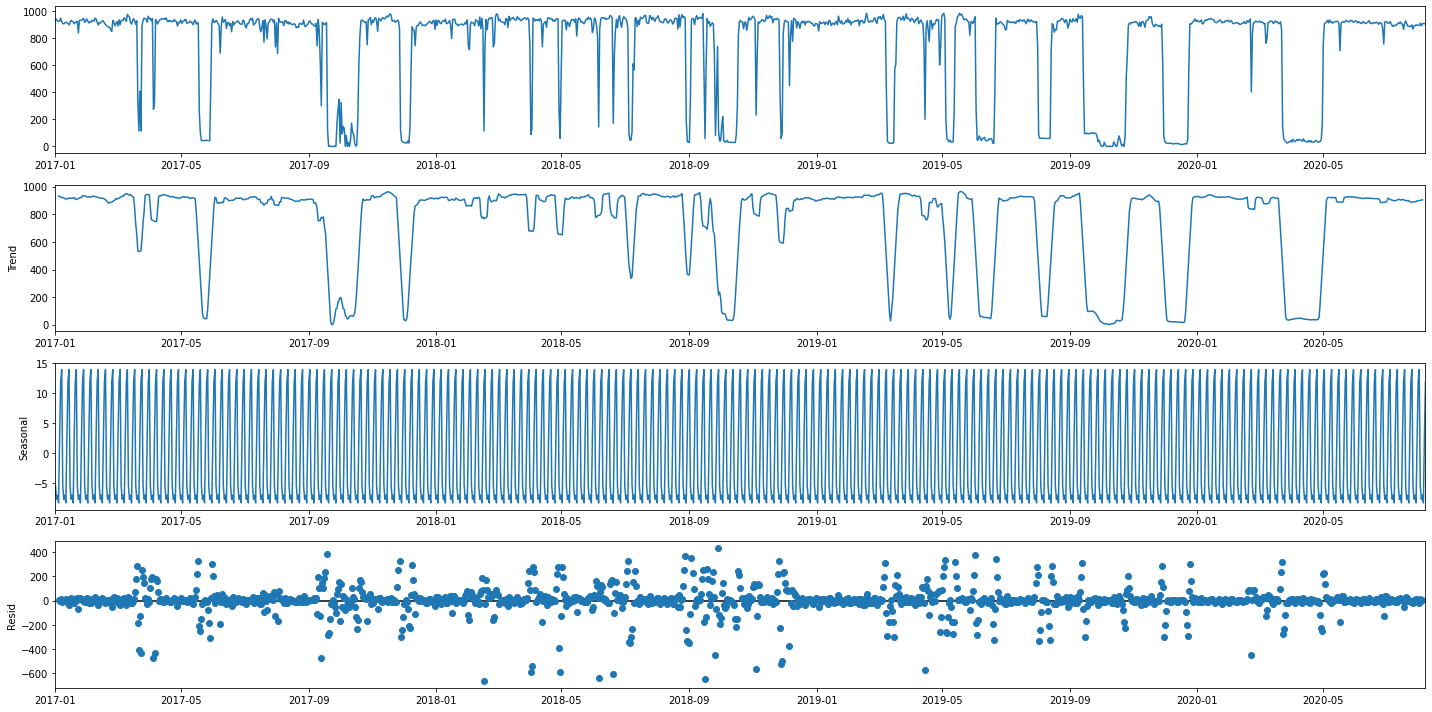

In [39]:
plt.rcParams['figure.figsize']=(20,10)
decomposition = seasonal_decompose(dt2,model='additive')
decomposition.plot();

Here the anomalies occurred at 2017-04, 2017-06, 2017-09, 2017-11, 2018-3, 2018-4, 2018-5, 2018-7, there are lot anomalies between 2018-9 to 2018-12, 2019-4, 2019-6,2019-7 , 2019-8, 2019-10, 2019-11, 2019-12, 2020-04, 2020-05. 

# Cyclone Outlet gas Draft

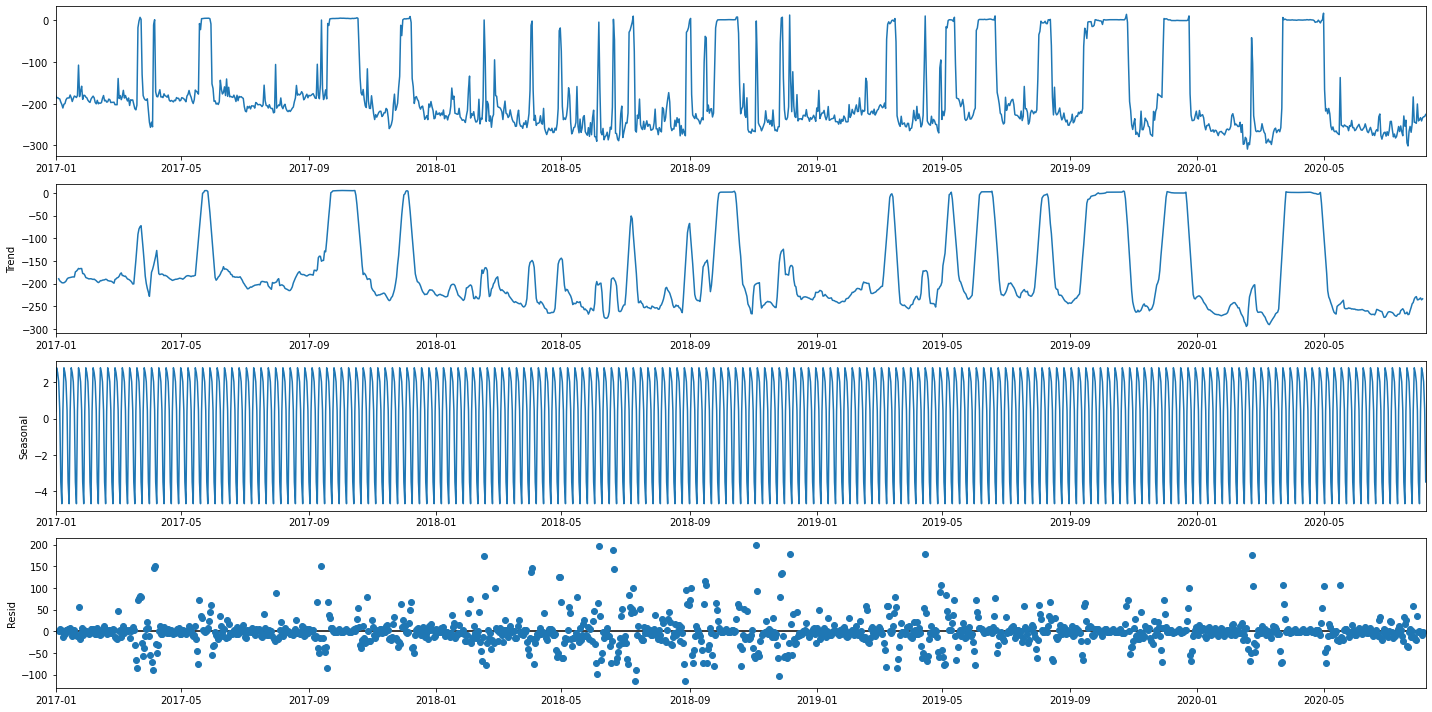

In [40]:
plt.rcParams['figure.figsize']=(20,10)
decomposition = seasonal_decompose(dt3,model='additive')
decomposition.plot();

Here the anomalies are more random and no pattern is being generated but the most extreme anomalies can be detected at 2017-4, 2017-9, 2018-3, 2018-6,2018-7 , 2018-10, 2019-05, 2020-04.

# Cyclone Cone Draft 

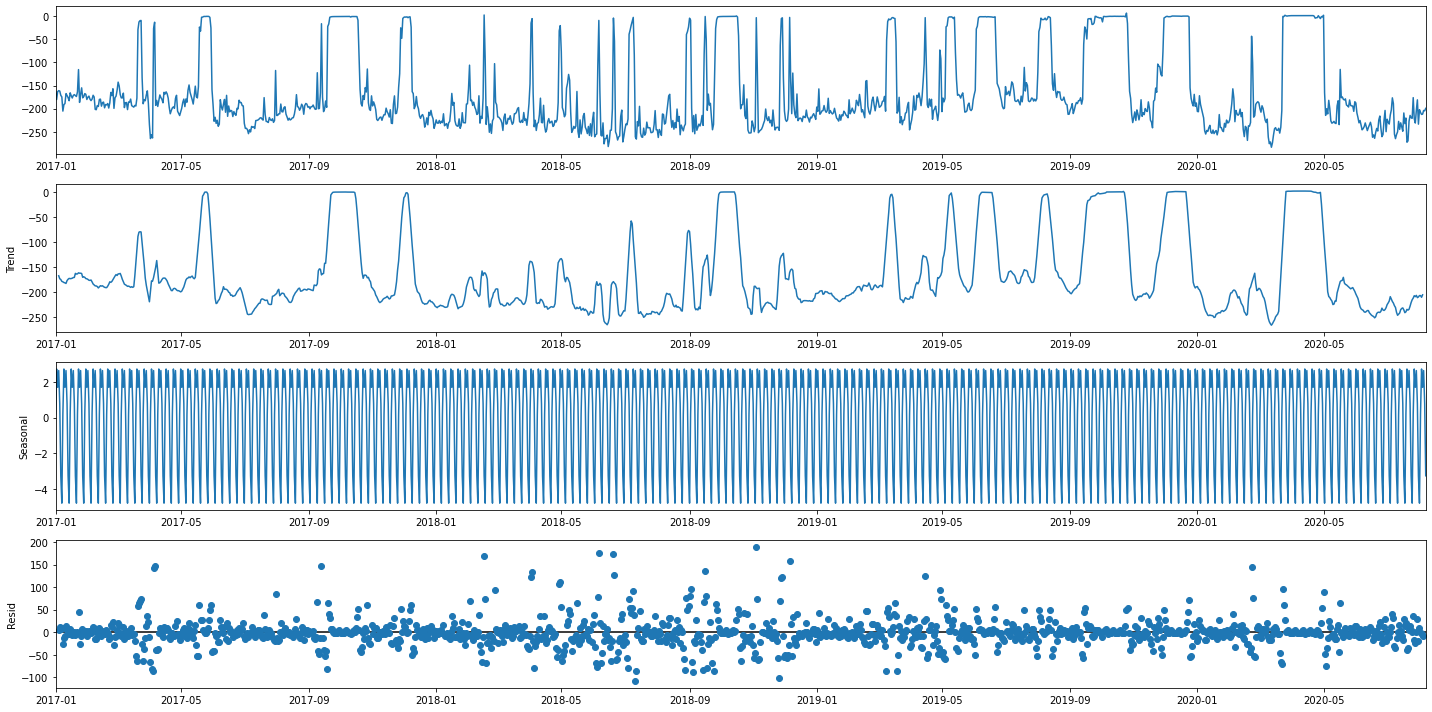

In [41]:
plt.rcParams['figure.figsize']=(20,10)
decomposition = seasonal_decompose(dt4 ,model='additive')
decomposition.plot();

Here the anomalies are more random and no pattern is being generated however the extreme anomalies can be seen at 2017-04, 2017-09, 2018-03, 2018-07 ,again more anomalies between 2018-09 to 2018-12, 2019-05 2020-03

# Cyclone Gas Outlet Temp

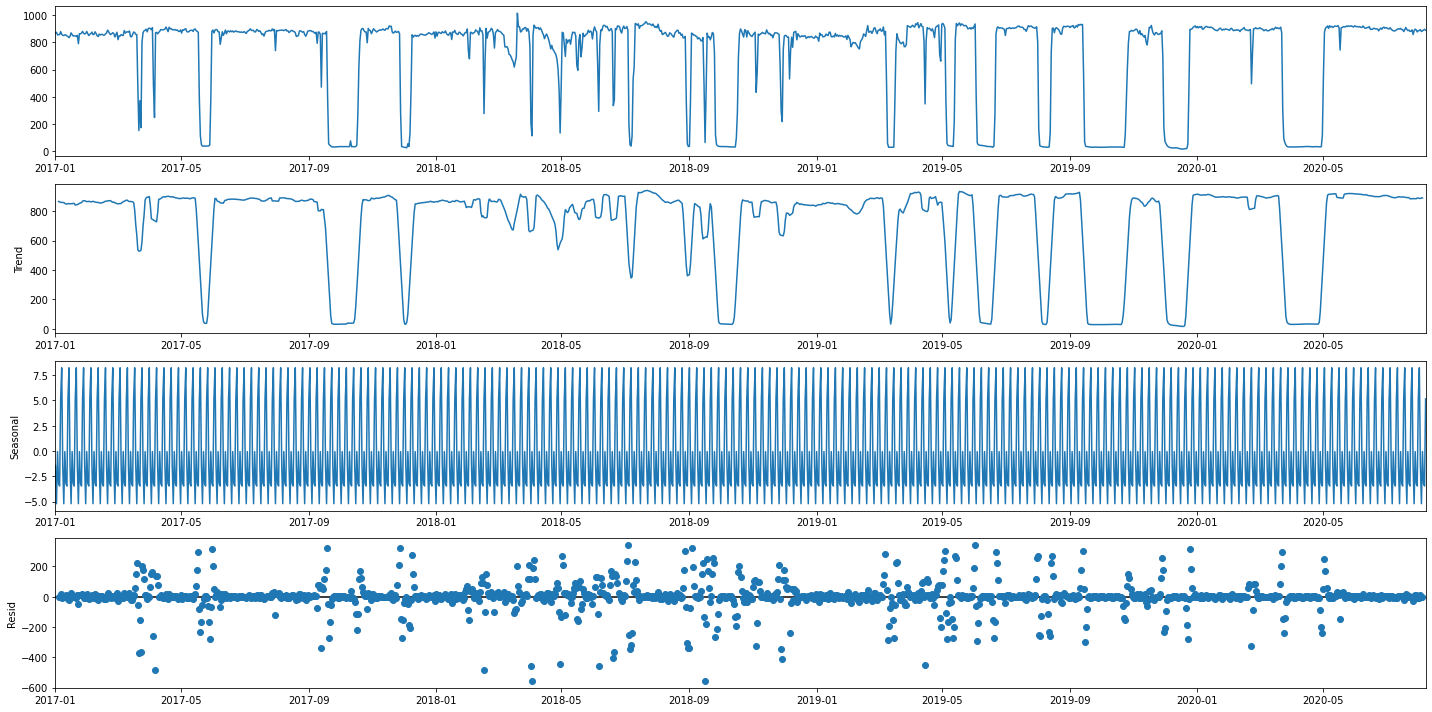

In [42]:
plt.rcParams['figure.figsize']=(20,10)
decomposition = seasonal_decompose(dt5 ,model='additive')
decomposition.plot();

The anomalies here are much more clustered and not completely random 2017-03,2017-06, repetitive anomalies between 2017-09 to 2017-12, more random anomalies between 2018-03 to 2018- 12 ,2019-04, 2019-05,2019-06,2019-07,2019-08,2019-09,2019-11,2019-12
2020-01,2020-03,2020-04,2020-05

# Cyclone Inlet Draft temp

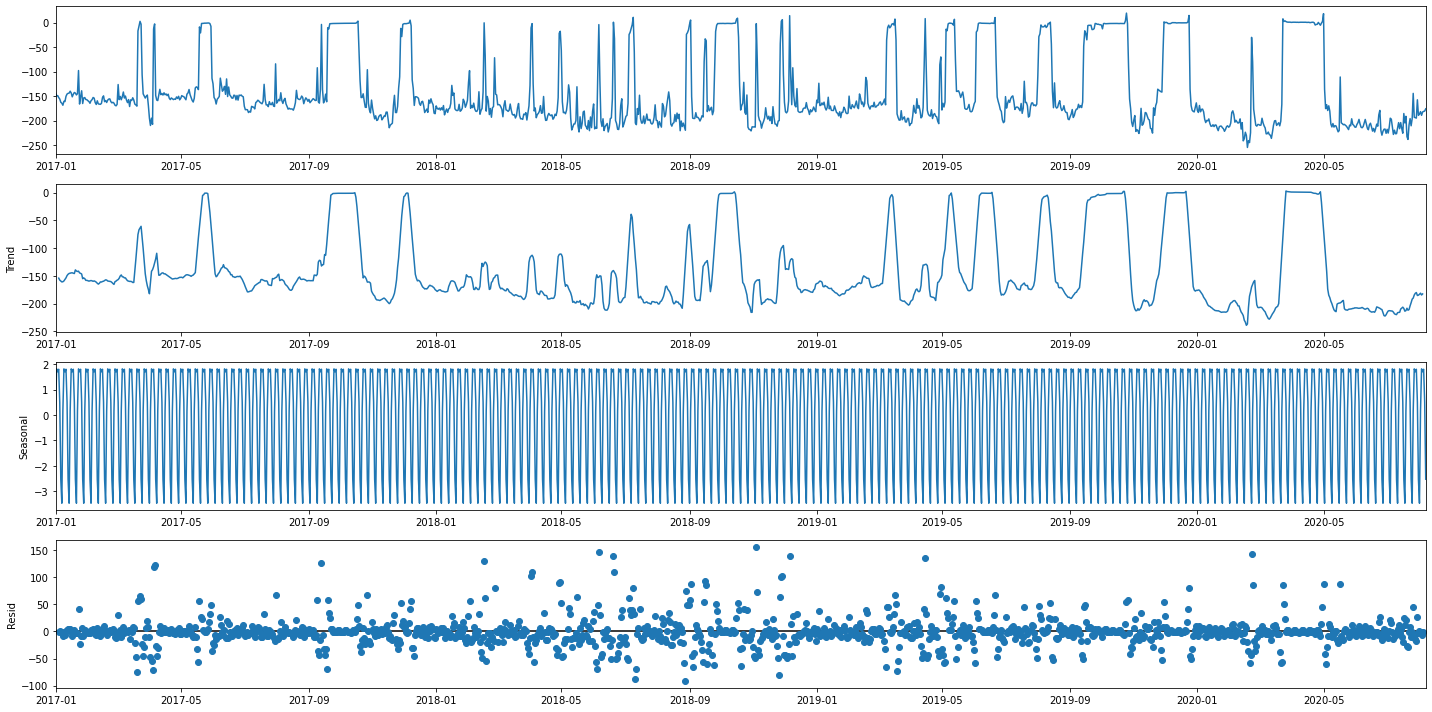

In [43]:
plt.rcParams['figure.figsize']=(20,10)
decomposition = seasonal_decompose(dt6 ,model='additive')
decomposition.plot();

Here the anomalies are much more random so the extreme anomalies occur at 2017-04,2017-09,2018-03,again more random anomalies between 2018-03 to 2018-12, 2019-05, 2019-09,2020-03.